#### Importing Necessary Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings



#### Loading datasets into pandas dataframe

In [9]:
sets = pd.read_csv(r'D:\EDA using Pandas\archive\sets.csv')
themes = pd.read_csv(r'D:\EDA using Pandas\archive\themes.csv')
colors = pd.read_csv(r'D:\EDA using Pandas\archive\colors.csv')
parts = pd.read_csv(r'D:\EDA using Pandas\archive\parts.csv')
part_categories = pd.read_csv(r'D:\EDA using Pandas\archive\part_categories.csv')
inventories = pd.read_csv(r'D:\EDA using Pandas\archive\inventories.csv')
inventory_parts = pd.read_csv(r'D:\EDA using Pandas\archive\inventory_parts.csv')
inventory_sets = pd.read_csv(r'D:\EDA using Pandas\archive\inventory_sets.csv')


##### Basic Info

In [ ]:
# Number of rows and columns in each dataset
print("Sets:", sets.shape)
print("Themes:", themes.shape)
print("Colors:", colors.shape)
print("Parts:", parts.shape)
print("Part_Catgories:", part_categories.shape)
print("Inventories:", inventories.shape)
print("Inventory Parts:", inventory_parts.shape)
print("Iventory_sets:", inventory_sets.shape)


Sets: (11673, 5)
Themes: (614, 3)
Colors: (135, 4)
Parts: (25993, 3)
Prt_Catgories: (57, 2)
Inventories: (11681, 3)
Inventory Parts: (580251, 5)
Iventory_sets: (2846, 3)


In [ ]:
# columns in each dataset
print("Sets:", sets.columns)
print("Themes:", themes.columns)
print("Colors:", colors.columns)
print("Parts:", parts.columns)
print("Part_Catgories:", part_categories.columns)
print("Inventories:", inventories.columns)
print("Inventory Parts:", inventory_parts.columns)
print("Iventory_sets:", inventory_sets.columns)


Sets: Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')
Themes: Index(['id', 'name', 'parent_id'], dtype='object')
Colors: Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')
Parts: Index(['part_num', 'name', 'part_cat_id'], dtype='object')
Part_Catgories: Index(['id', 'name'], dtype='object')
Inventories: Index(['id', 'version', 'set_num'], dtype='object')
Inventory Parts: Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare'], dtype='object')
Iventory_sets: Index(['inventory_id', 'set_num', 'quantity'], dtype='object')


#### Null and Duplicate Analysis per dataset per column

In [23]:

dataframes = {
    'sets': sets,
    'themes': themes,
    'colours': colors,
    'parts': parts,
    'part_categories': part_categories,
    'inventories': inventories,
    'inventory_sets': inventory_sets,
    'inventory_parts': inventory_parts
}

summary = []

for name, df in dataframes.items():
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        duplicate_count = df[col].duplicated().sum()
        duplicate_percentage = (duplicate_count / len(df)) * 100

        summary.append({
            'dataset_name': name,
            'column_name': col,
            'null_count': null_count,
            'null_percentage': f"{null_percentage:.2f}%",
            'duplicate_count': duplicate_count,
            'duplicate_percentage': f"{duplicate_percentage:.2f}%"
        })

summary_df = pd.DataFrame(summary)
summary_df


,dataset_name,column_name,null_count,null_percentage,duplicate_count,duplicate_percentage
0,sets,set_num,0,0.00%,0,0.00%
1,sets,name,0,0.00%,1303,11.16%
2,sets,year,0,0.00%,11607,99.43%
3,sets,theme_id,0,0.00%,11098,95.07%
4,sets,num_parts,0,0.00%,10581,90.65%
5,themes,id,0,0.00%,0,0.00%
6,themes,name,0,0.00%,212,34.53%
7,themes,parent_id,111,18.08%,535,87.13%
8,colours,id,0,0.00%,0,0.00%
9,colours,name,0,0.00%,0,0.00%


#### Top most complex sets(Sets having the the most number of parts)

In [46]:
top_complex_sets = sets[['set_num','name','num_parts']].sort_values('num_parts', ascending = False).head(5)

top_complex_sets

,set_num,name,num_parts
170,10189-1,Taj Mahal,5922
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,5461
1337,2000409-1,Window Exploration Bag,5200
161,10179-1,Millennium Falcon - UCS,5195
8322,75827-1,Firehouse Headquarters,4640


##### Visualizing the top 5 most complex sets

C:\Users\HP\AppData\Local\Temp\ipykernel_19384\1198031900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


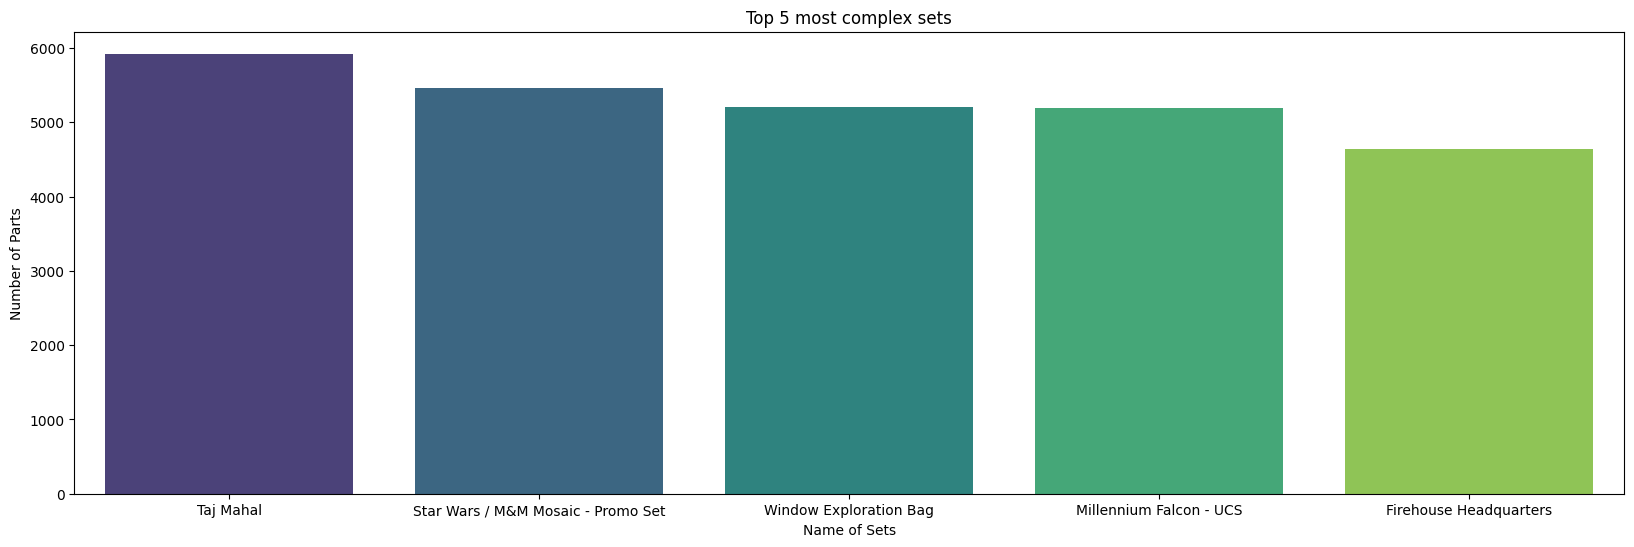

In [49]:
plt.figure(figsize =(20,6))
sns.barplot(
    data = top_complex_sets,
    x = 'name',
    y = 'num_parts',
    palette = 'viridis'
)
plt.title('Top 5 most complex sets')
plt.xlabel('Name of Sets')
plt.ylabel('Number of Parts')
plt.show()

#### Transparency Distribution in Lego Colors

In [57]:
import numpy as np

# Calculate value counts including NaNs, normalize for percentage
percentages = colors['is_trans'].value_counts(normalize=True, dropna=False) * 100

# Replace NaN with a string label first
percentages.index = percentages.index.where(percentages.index.notna(), 'Unknown')

# Map 0 and 1 to meaningful labels, keep 'Unknown' as is
percentages = percentages.rename(index={'f': 'Opaque', 't': 'Transparent'})

print(percentages.round(2))


is_trans
Opaque         79.26
Transparent    20.74
Name: proportion, dtype: float64


#### Visualizing Transparency Distribution across colors

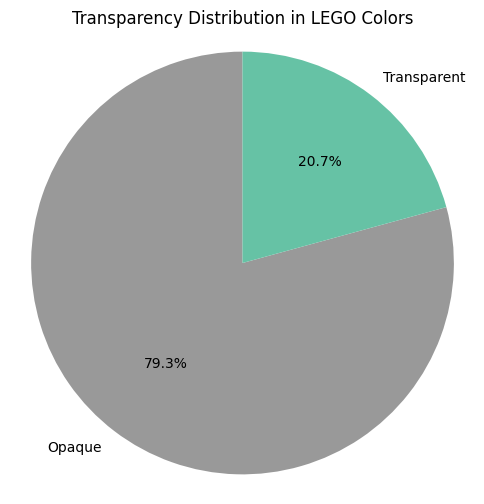

In [58]:
import matplotlib.pyplot as plt

# Calculate proportions
transparency_counts = colors['is_trans'].map({'f': 'Opaque', 't': 'Transparent'}).value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    transparency_counts,
    labels=transparency_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#999999', '#66c2a5']
)
plt.title('Transparency Distribution in LEGO Colors')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


#### Part Categories with the most units produced

In [64]:
part_and_category_df = parts.merge(part_categories, left_on = 'part_cat_id', right_on = 'id', how = 'inner')

category_with_most_parts = part_and_category_df.groupby('name_y')['part_num']\
    .count().reset_index().rename(columns ={'part_num':'num_of_parts','name_y':'category_name'}).sort_values('num_of_parts',ascending = False).head(5)
category_with_most_parts

,category_name,num_of_parts
20,Minifigs,8556
19,Minifig Accessories,2071
22,Non-LEGO,1964
13,"Duplo, Quatro and Primo",1552
47,Tiles Printed,1191


#### Visualizing the part categories with the most units produced

C:\Users\HP\AppData\Local\Temp\ipykernel_19384\1075703099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


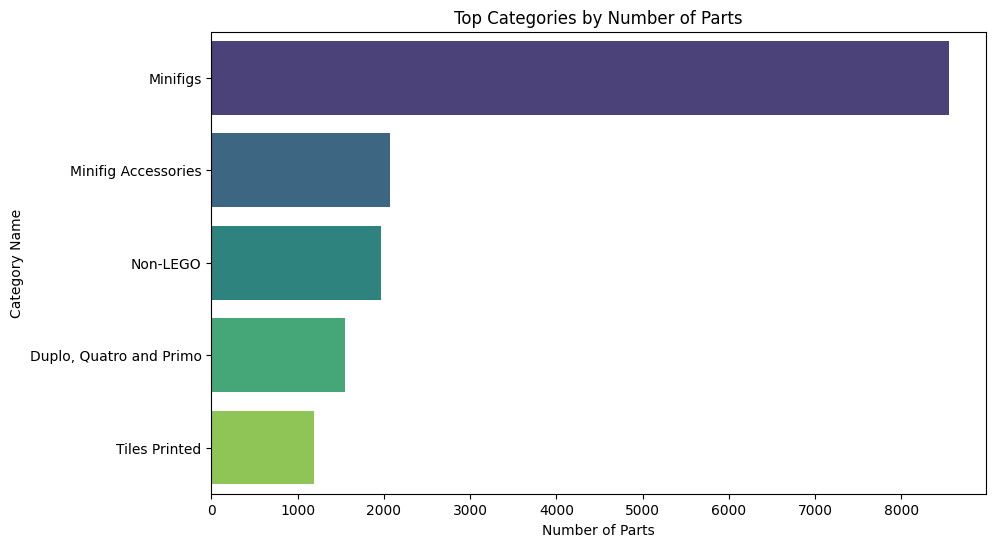

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = category_with_most_parts,
    y = 'category_name',
    x = 'num_of_parts',
    palette = 'viridis'
)
plt.title('Top Categories by Number of Parts')
plt.xlabel('Number of Parts')
plt.ylabel('Category Name')
plt.show()

#### Getting the most popular themes by number of sets in each theme

In [31]:
#Joining the sets and themes dataset
set_and_theme_df = pd.merge(sets, themes, left_on = 'theme_id', right_on = 'id', how = 'inner', suffixes = ('_sets','_themes'))
##Counting number of sets per theme
theme_popularity = set_and_theme_df.groupby('name_themes')['set_num']\
    .nunique().reset_index().rename(columns = {'set_num':'num_of_sets_per_theme'}).sort_values('num_of_sets_per_theme', ascending = False)

top_themes = theme_popularity.head(10)

top_themes

,name_themes,num_of_sets_per_theme
320,Supplemental,496
322,Technic,435
56,City,287
110,Friends,269
30,Basic Set,257
70,Creator,249
117,Gear,246
281,Service Packs,242
89,Duplo,219
302,Star Wars,211


#### Visualizing most popular themes

C:\Users\HP\AppData\Local\Temp\ipykernel_19384\1407014119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


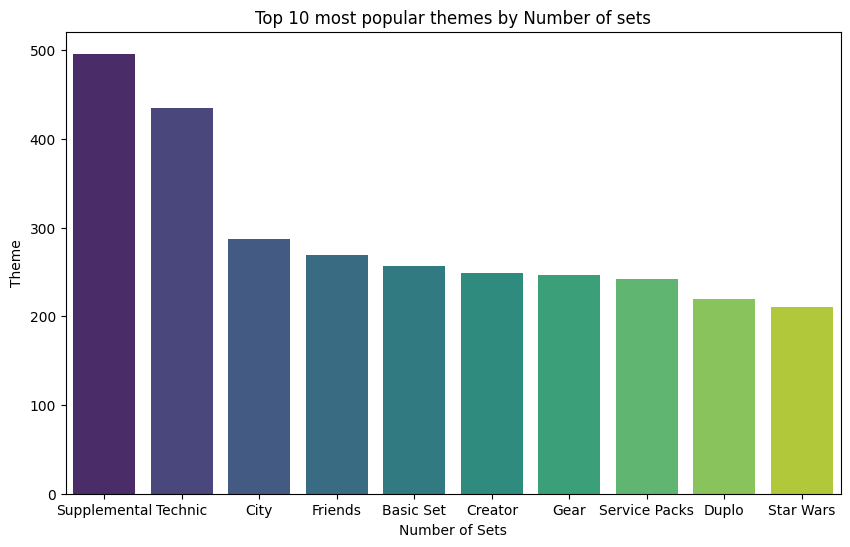

In [33]:
#seaborn barplot

plt.figure(figsize=(10,6))
sns.barplot(
    data = top_themes,
    x = 'name_themes',
    y = 'num_of_sets_per_theme',
    palette = 'viridis'
)
plt.title('Top 10 most popular themes by Number of sets')
plt.xlabel('Number of Sets')
plt.ylabel('Theme')
plt.show()

#### Theme Popularity over the years

In [41]:
theme_popularity_by_year = set_and_theme_df.groupby(['year','name_themes'])['set_num']\
    .nunique().reset_index().rename(columns ={'set_num':'num_of_sets'}).sort_values(['year','num_of_sets'],ascending = [True,False])

top_themes = theme_popularity_by_year.groupby('name_themes')['num_of_sets'].sum().sort_values(ascending = False).head(5).index

theme_year_top = theme_popularity_by_year[theme_popularity_by_year['name_themes'].isin(top_themes)]
theme_year_top

,year,name_themes,num_of_sets
1,1950,Supplemental,6
0,1950,Basic Set,1
2,1953,Supplemental,4
3,1954,Supplemental,12
7,1955,Supplemental,20
...,...,...,...
2036,2016,Technic,11
1969,2016,Basic Set,1
2058,2017,Friends,18
2093,2017,Technic,11


#### Visualizing theme popularity over the years

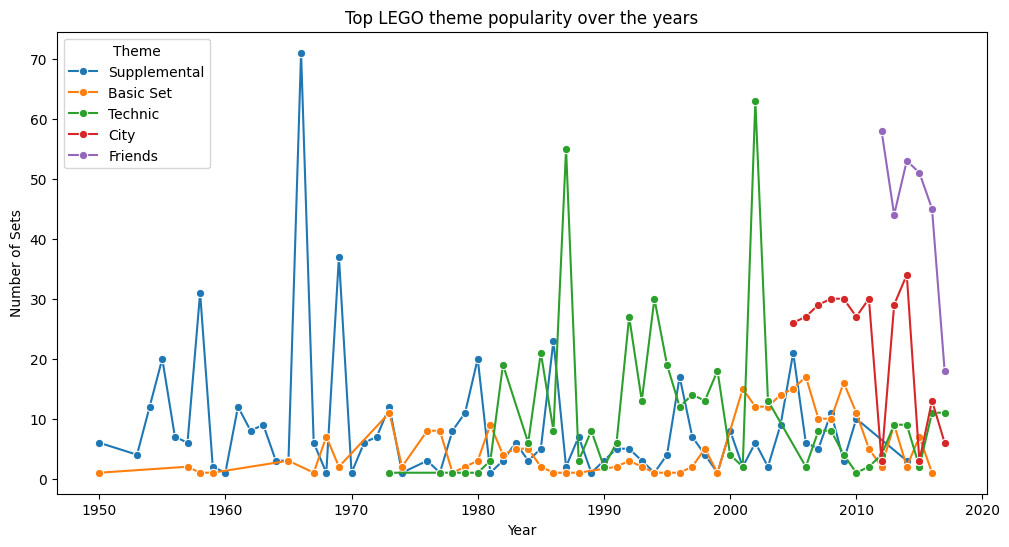

In [42]:
plt.figure(figsize =(12,6))
sns.lineplot(
    data = theme_year_top,
    x = 'year',
    y = 'num_of_sets',
    hue = 'name_themes',
    marker = 'o'
)
plt.title('Top LEGO theme popularity over the years')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.legend(title = 'Theme')
plt.show()

#### Sets that are in stock/out of stock

In [67]:
sets_inventories_df = sets.merge(inventories, on = 'set_num', how = 'left', indicator = True)

sets_inventories_df['in_stock'] = sets_inventories_df['_merge'] =='both'

print(sets_inventories_df['in_stock'].value_counts())

in_stock
True     11681
False        3
Name: count, dtype: int64


#### Visualizing sets that are in stock and out of stock

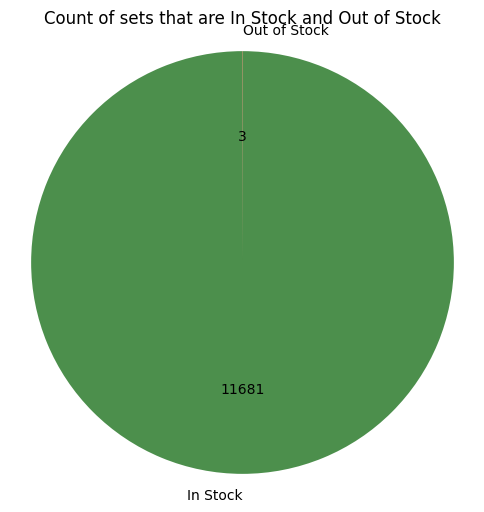

In [71]:
import matplotlib.pyplot as plt

# Calculate proportions
stock_count = sets_inventories_df['in_stock'].map({True: 'In Stock', False: 'Out of Stock'}).value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    stock_count,
    labels=stock_count.index,
    autopct=lambda p: f"{int(round(p/100*stock_count.sum()))}",
    startangle=90,
    colors=["#4C8F4C", "#b85422"]
)
plt.title('Count of sets that are In Stock and Out of Stock')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


#### Analyzing sets that have limited stock 

In [73]:
# Join sets with inventory_sets on 'set_num'
sets_inventory = sets.merge(
    inventory_sets,
    on="set_num",
    how="left"
)

# Sum quantity per set
quantity_per_set = (
    sets_inventory.groupby("name")["quantity"]
    .sum()
    .reset_index()
)

# Filter sets with total quantity exactly 1 (limited stock)
limited_stock = quantity_per_set[quantity_per_set["quantity"] == 1]

print(limited_stock)


                            name  quantity
2                        Spectre       1.0
4      'Where Are My Pants?' Guy       1.0
291             4 × 4 Fire Truck       1.0
313               458 Italia GT2       1.0
318       4WD with Horse Trailer       1.0
...                          ...       ...
10349         Zombie Cheerleader       1.0
10350              Zombie Pirate       1.0
10356   Zookeeper - Complete Set       1.0
10367         {Rock Saw Vehicle}       1.0
10368            {Town Vehicles}       1.0

[1920 rows x 2 columns]


#### Spare Parts Analysis

In [76]:
spare_count = inventory_parts['is_spare'].value_counts(normalize = True)*100

spare_count.index = spare_count.index.map({'f':'No Spare', 't':'Has Spare'})

print(spare_count.round(2))

is_spare
No Spare     94.92
Has Spare     5.08
Name: proportion, dtype: float64


#### Visualizing Spare part distribution

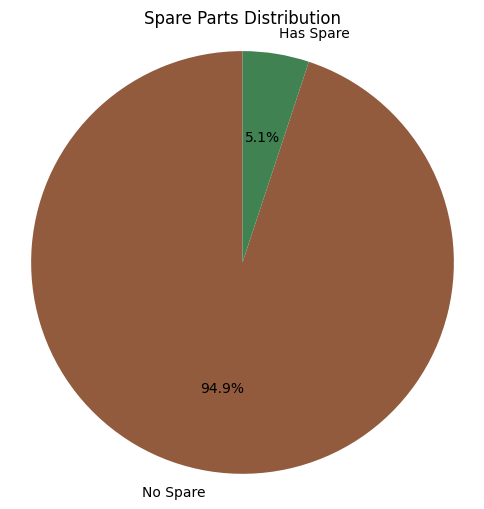

In [79]:


# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    spare_count,
    labels=spare_count.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#925B3D", "#418253"]
)
plt.title('Spare Parts Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

#### Most popular LEGO color

C:\Users\HP\AppData\Local\Temp\ipykernel_19384\1337558862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


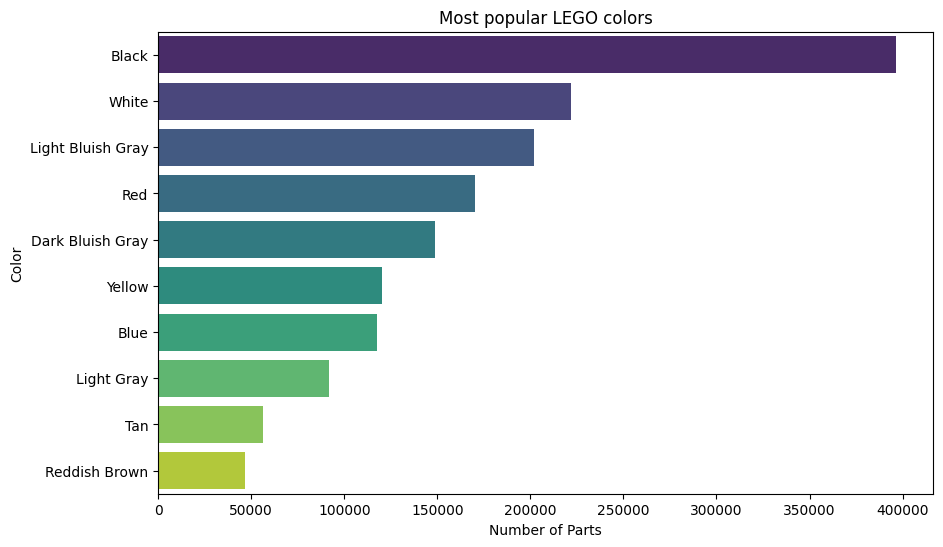

In [75]:
parts_color = inventory_parts.merge(colors, left_on = 'color_id', right_on = 'id', how = 'left')

color_popularity = parts_color.groupby('name')['quantity'].sum().reset_index().sort_values('quantity', ascending = False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data = color_popularity,
    y = 'name',
    x = 'quantity',
    palette = 'viridis'
)
plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.title('Most popular LEGO colors')
plt.show()